<a href="https://colab.research.google.com/github/geekatbest/IEEE-Team-23-24/blob/main/Proj_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import cv2

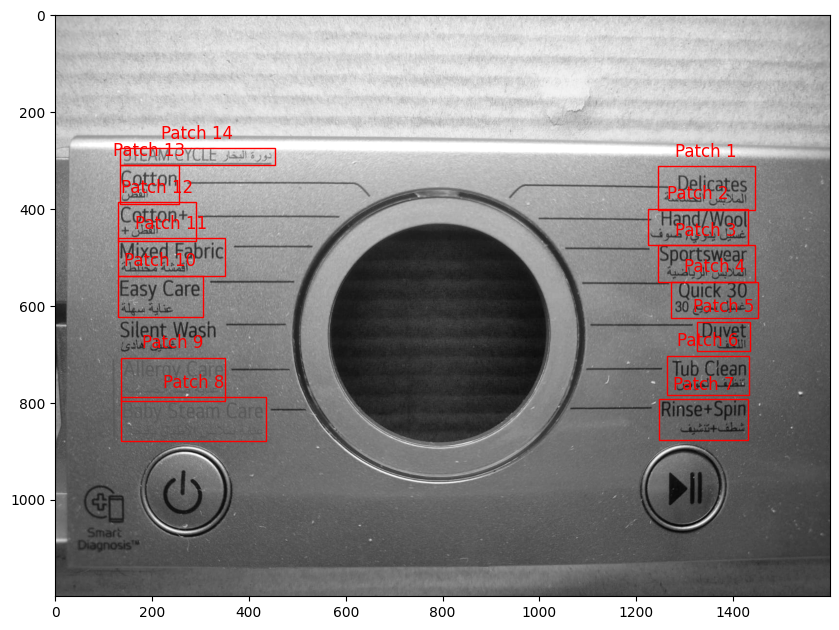

In [89]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
sample = cv2.imread('/content/sample-3.jpeg')

# Convert the image to grayscale using OpenCV
sample_g = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

# Define patch locations and sizes (x, y, width, height)
patches_info = [
    (1244, 312, 200, 90),  # Delicates
    (1225, 399, 205, 75),  # Hand/Wool
    (1244, 475, 200, 75),  # Sportswear
    (1272, 550, 180, 75),  # Quick 30
    (1325, 633, 110, 60),  # Duvet
    (1263, 703, 170, 80),  # Tub Clean
    (1246, 793, 185, 83),  # Rinse+Spin
    (136, 788, 300, 90),   # Baby Steam Care
    (136, 707, 215, 90),   # Allergy Care
    (130, 538, 175, 85),   # Easy Care
    (130, 460, 220, 78),   # Mixed Fabric
    (130, 386, 160, 80),   # Cotton +
    (133, 310, 122, 80),   # Cotton
    (133, 275, 320, 35),   # Steam Cycle
]

# Plotting
plt.figure(figsize=(10, 10))

# Plot the original image with the patches locations marked
plt.imshow(sample_g, cmap='gray')

# Iterate over each patch location and size
for i, (x, y, width, height) in enumerate(patches_info):
    # Extract the patch
    patch = sample_g[y:y+height, x:x+width]

    # # Save the extracted patch
    # patch_name = f'extracted_patch_{i+1}.jpg'
    # cv2.imwrite(patch_name, patch)

    # Add rectangle around the patch location
    plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='r', facecolor='none'))

    # Add annotations for the axis markings
    plt.text(x + width / 2, y - 20, f'Patch {i+1}', color='r', fontsize=12, ha='center')

# Save the image with annotations
plt.axis('on')
plt.savefig('Template-patches.jpg')
plt.show()


<ipython-input-90-b0989f2bee9c>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(std_dev_ref[0] / std_dev_tgt[0])
<ipython-input-90-b0989f2bee9c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta = float(mean_ref[0] - alpha * mean_tgt[0])


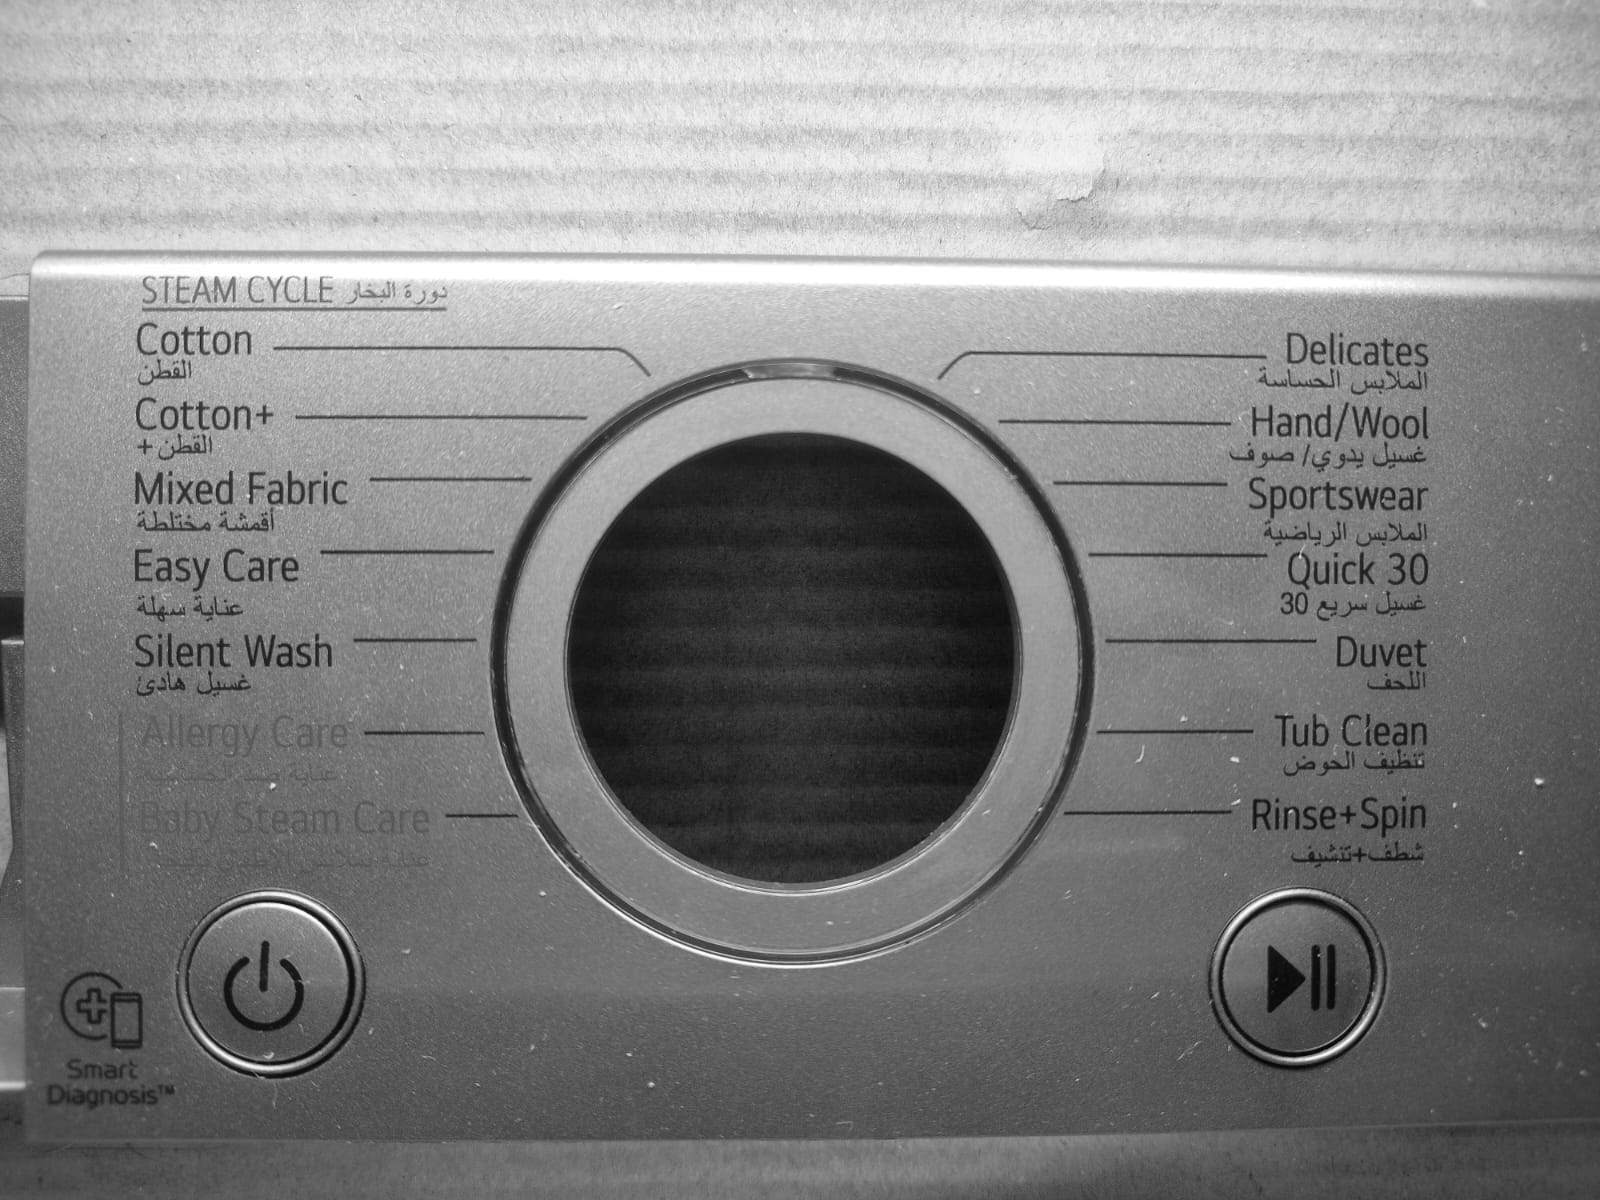

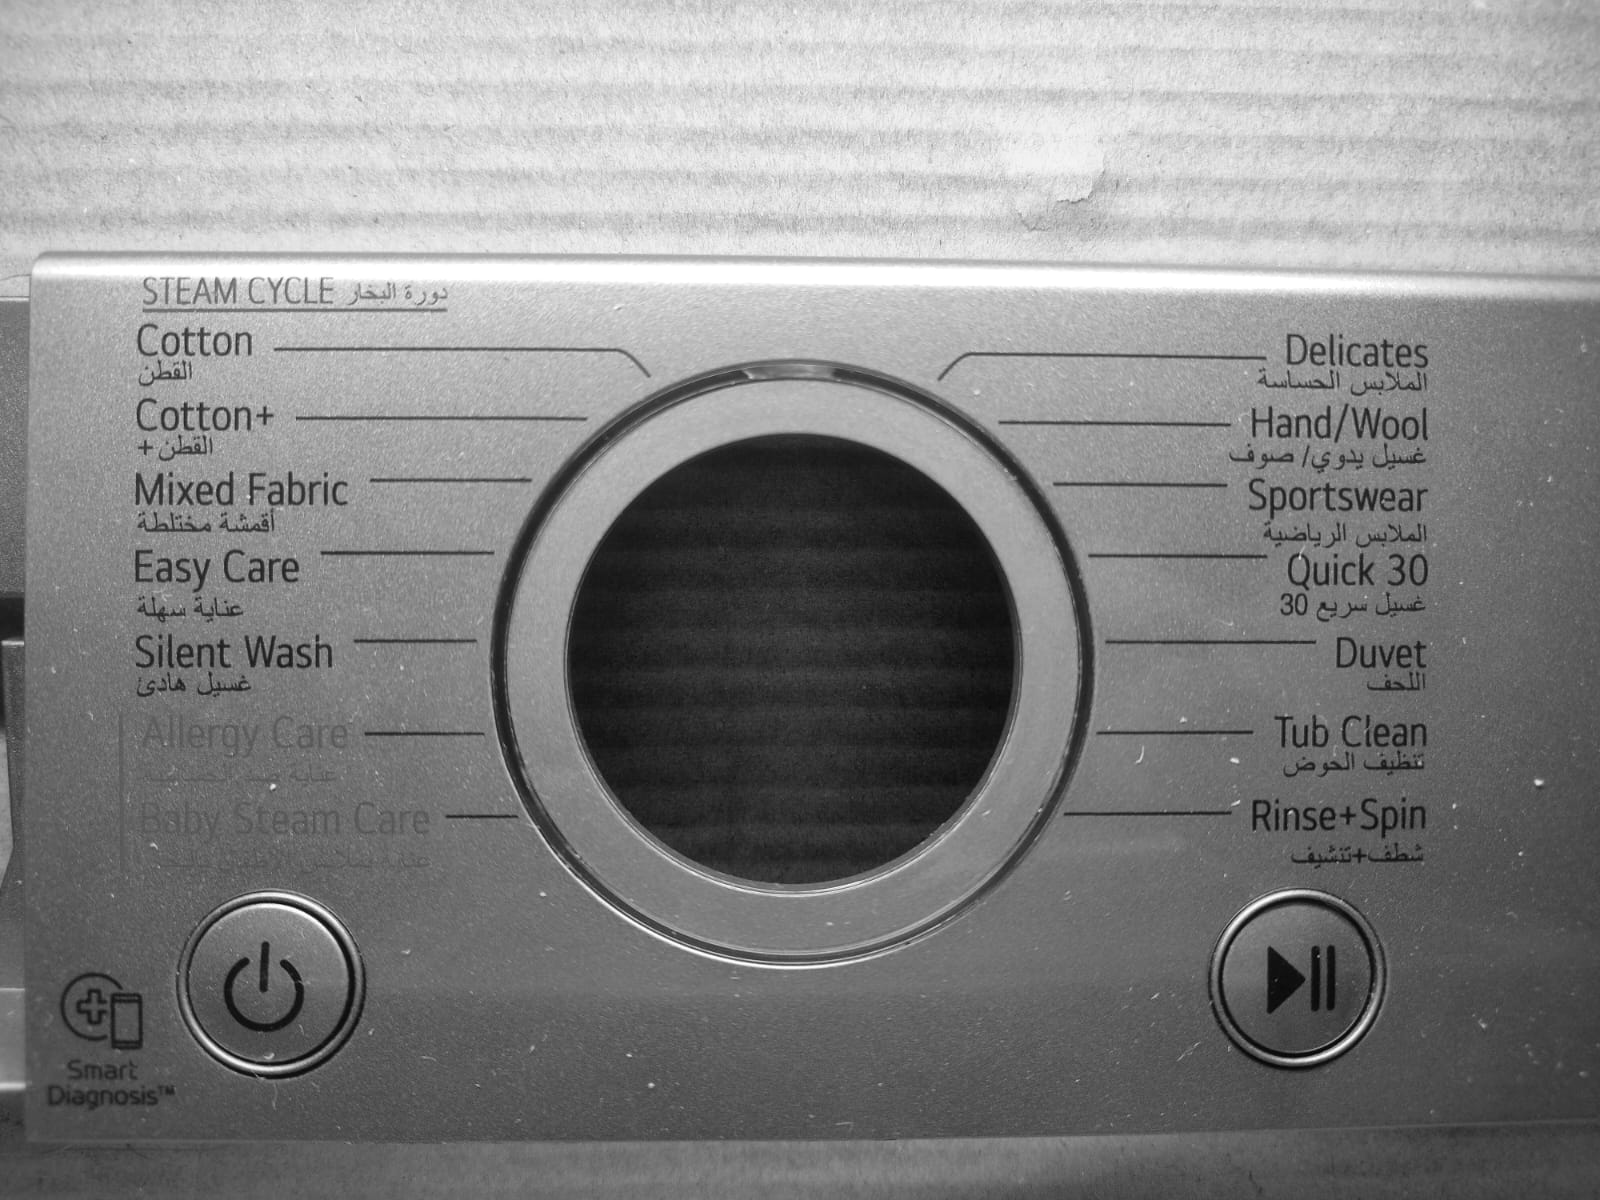

True

In [90]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def match_contrast_brightness_exposure(reference_image, target_image):
    # Compute mean and standard deviation of pixel intensities for both images
    mean_ref, std_dev_ref = cv2.meanStdDev(reference_image)
    mean_tgt, std_dev_tgt = cv2.meanStdDev(target_image)

    # Calculate scaling factors to match mean and standard deviation
    alpha = float(std_dev_ref[0] / std_dev_tgt[0])
    beta = float(mean_ref[0] - alpha * mean_tgt[0])

    # Apply contrast and brightness adjustments to target image
    adjusted_image = cv2.convertScaleAbs(target_image, alpha=alpha, beta=beta)

    return adjusted_image

# Load the images
image1 = cv2.imread('/content/sample-3.jpeg')
image2 = cv2.imread('/content/sample-2.jpeg')

# Convert images to grayscale if needed
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Match contrast, brightness, and exposure of image2 to image1
adjusted_image2 = match_contrast_brightness_exposure(image1_gray, image2_gray)

# Display the adjusted image2
cv2_imshow(image1_gray)
cv2_imshow(adjusted_image2)
cv2.imwrite('image1_gray.jpg', image1_gray)
cv2.imwrite('adjusted_image.jpg', adjusted_image2)

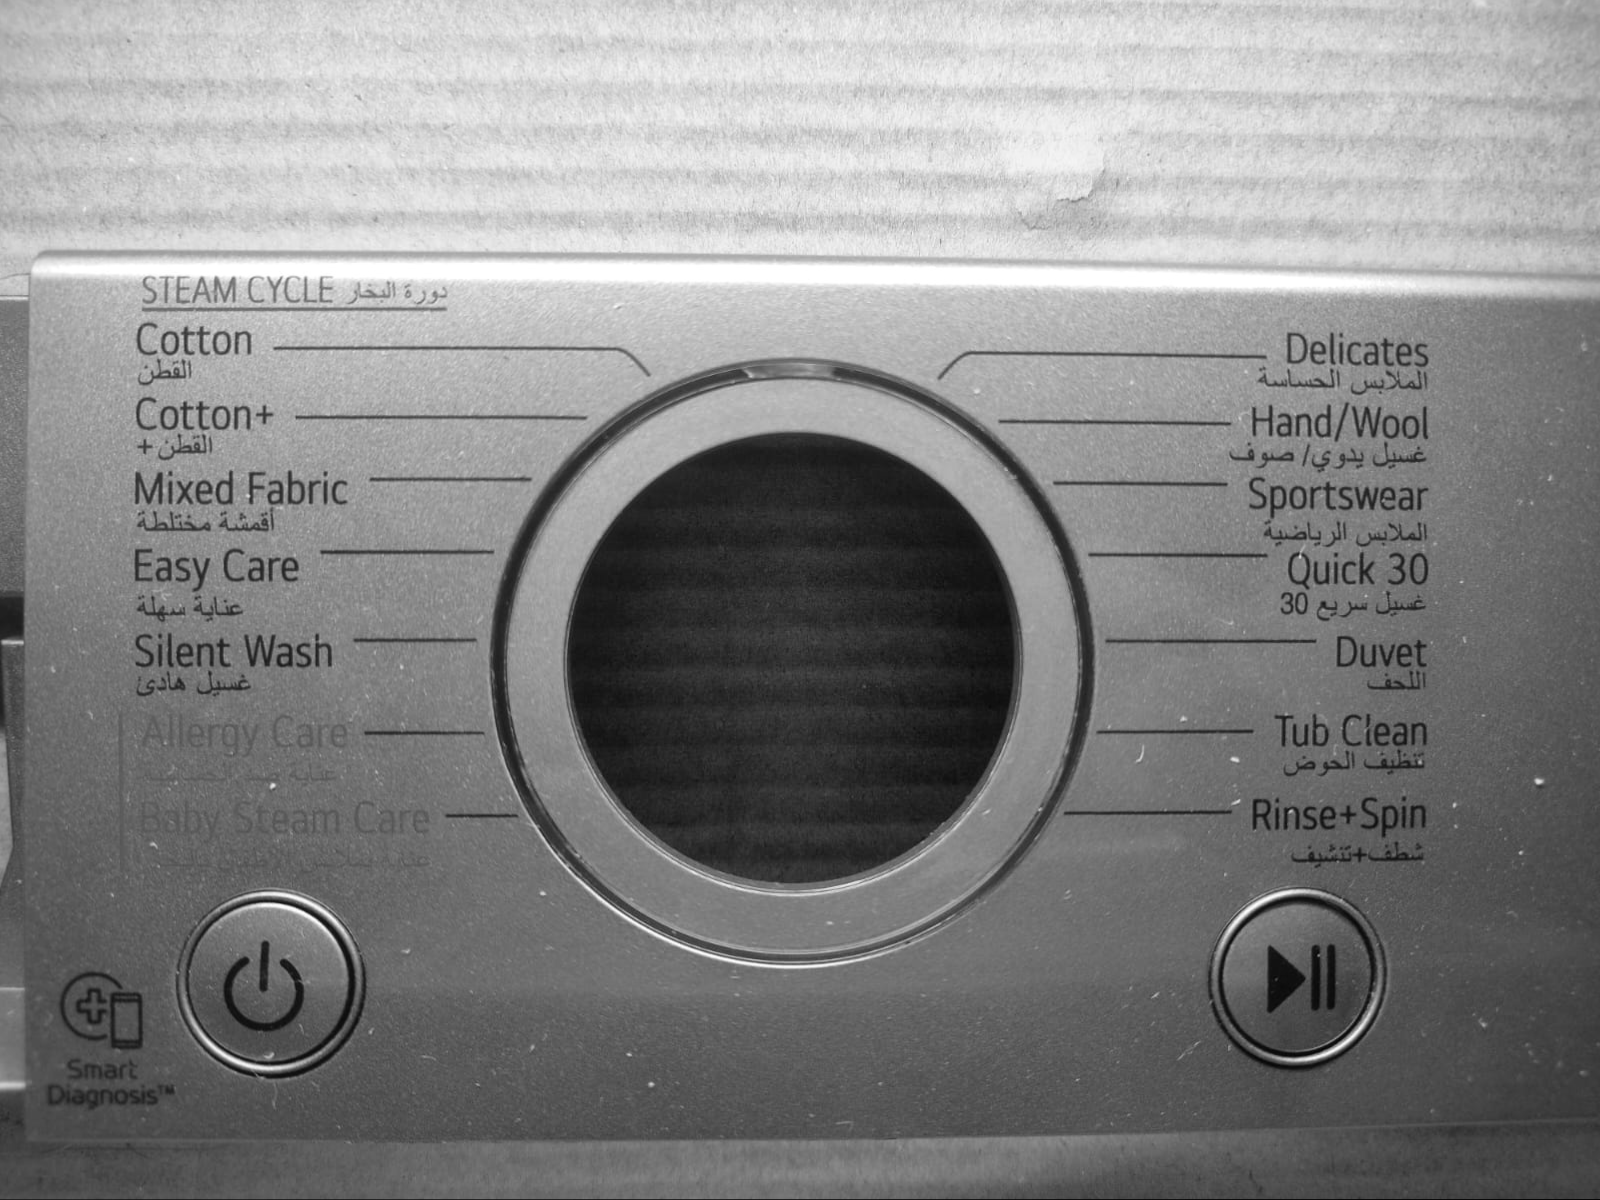

In [91]:
import cv2
import numpy as np

# Read the reference image
reference_img = cv2.imread('/content/image1_gray.jpg', cv2.IMREAD_GRAYSCALE)

# Read the image to be registered
image_to_register = cv2.imread('/content/adjusted_image.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors for both images
keypoints_ref, descriptors_ref = sift.detectAndCompute(reference_img, None)
keypoints_to_register, descriptors_to_register = sift.detectAndCompute(image_to_register, None)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher()

# Match descriptors of the reference image and the image to be registered
matches = flann.knnMatch(descriptors_ref, descriptors_to_register, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract matched keypoints
matched_keypoints_ref = np.float32([keypoints_ref[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
matched_keypoints_to_register = np.float32([keypoints_to_register[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography
H, _ = cv2.findHomography(matched_keypoints_to_register, matched_keypoints_ref, cv2.RANSAC, 5.0)

# Warp the image to be registered to align with the reference image
registered_image = cv2.warpPerspective(image_to_register, H, (reference_img.shape[1], reference_img.shape[0]))

# Display the registered image
cv2_imshow(registered_image)
cv2.imwrite('registered_image.jpg', registered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


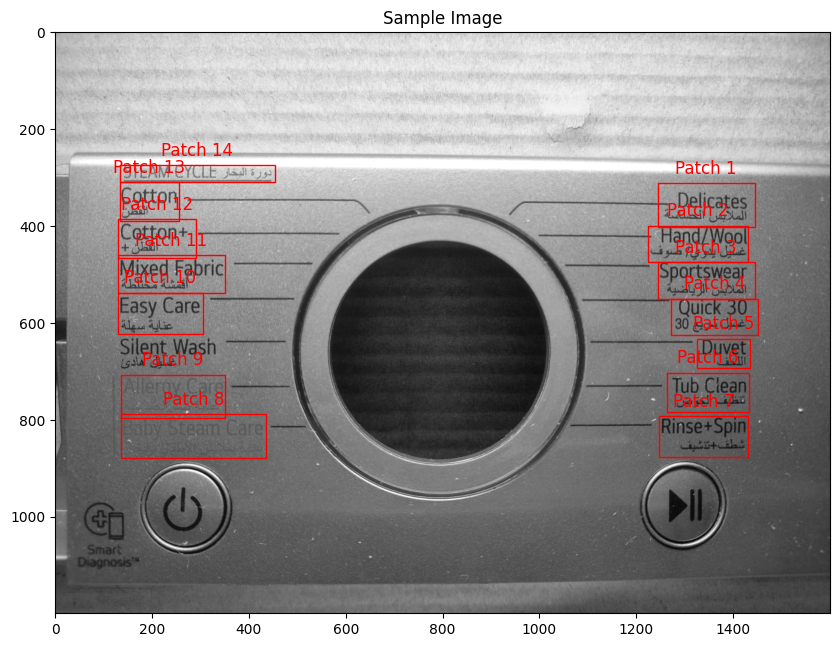

Patch matching results:
Patch 1: Matches
Patch 2: Matches
Patch 3: Matches
Patch 4: Matches
Patch 5: Matches
Patch 6: Matches
Patch 7: Matches
Patch 8: Does not match
Patch 9: Does not match
Patch 10: Matches
Patch 11: Matches
Patch 12: Matches
Patch 13: Matches
Patch 14: Matches


In [92]:
import cv2
import matplotlib.pyplot as plt

def extract_patch(image, x, y, width, height):
    """Function to extract a patch from an image based on the given location and size."""
    patch = image[y:y+height, x:x+width]
    return patch

# Read the original image using OpenCV
sample = cv2.imread('/content/image1_gray.jpg')

# Convert the original image to grayscale using OpenCV
sample_g = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

# Define patch locations and sizes (x, y, width, height)
patches_info = [
    (1244, 312, 200, 90),  # Delicates
    (1225, 399, 205, 75),  # Hand/Wool
    (1244, 475, 200, 75),  # Sportswear
    (1272, 550, 180, 75),  # Quick 30
    (1325, 633, 110, 60),  # Duvet
    (1263, 703, 170, 80),  # Tub Clean
    (1246, 793, 185, 83),  # Rinse+Spin
    (136, 788, 300, 90),   # Baby Steam Care
    (136, 707, 215, 90),   # Allergy Care
    (130, 538, 175, 85),   # Easy Care
    (130, 460, 220, 78),   # Mixed Fabric
    (130, 386, 160, 80),   # Cotton +
    (133, 310, 122, 80),   # Cotton
    (133, 275, 320, 35),   # Steam Cycle
]

# Plotting the original image with the patch locations marked
plt.figure(figsize=(10, 10))
plt.imshow(sample_g, cmap='gray')
plt.title('Sample Image')
plt.axis('on')

# Initialize a list to store patch matching results
patch_matches = []

# Iterate over each patch location and size
for i, (x, y, width, height) in enumerate(patches_info):
    # Extract the patch from the original image
    patch_original = extract_patch(sample_g, x, y, width, height)

    # Read the new input image using OpenCV
    new_sample = cv2.imread('/content/registered_image.jpg')

    # Convert the new input image to grayscale using OpenCV
    new_sample_g = cv2.cvtColor(new_sample, cv2.COLOR_BGR2GRAY)

    # Extract the patch from the new input image
    new_patch = extract_patch(new_sample_g, x, y, width, height)

    # Perform template matching between the patches
    result = cv2.matchTemplate(patch_original, new_patch, cv2.TM_CCOEFF_NORMED)

    # Define a threshold for template matching result
    threshold = 0.97

    # Determine if the patches match
    if result >= threshold:
        patch_matches.append((i+1, True))
    else:
        patch_matches.append((i+1, False))

    # Add rectangle around the patch location in the original image
    plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='r', facecolor='none'))

    # Add annotations for the axis markings
    plt.text(x + width / 2, y - 20, f'Patch {i+1}', color='r', fontsize=12, ha='center')

# Display the original image with marked patches
plt.show()

# Display the results of patch matching
print("Patch matching results:")
for patch_num, match_status in patch_matches:
    if match_status:
        print(f"Patch {patch_num}: Matches")
    else:
        print(f"Patch {patch_num}: Does not match")
